In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
def load_ith_data(file_path,index):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    for data in fileslist:
        if data.find('Rewards')!=-1 and data[-5]== str(index):
            rewards = np.load(file_path+'/' +data)[1:151]
        elif data.find('success')!=-1 and data[-5]== str(index):
            s_rate = np.load(file_path+'/' +data)[1:151]
        elif data.find('steps')!=-1 and data[-5]== str(index):
            steps = np.load(file_path+'/' +data)[1:151]
    train_epoch = np.arange(1,151)
    df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Steps':steps,'Train epoch':train_epoch,'repeat':str(index),'schema':file_path})
    return df

In [3]:
def load_vdn_data(file_path):
    fileslist  = os.listdir(file_path)
    total_data = []
    for i in range(4):
        df = load_ith_data(file_path,i)
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [4]:
def load_ppo_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(4):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i][1:]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i][1:]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i][1:]
        train_epoch = np.arange(2,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [4]:
a = load_vdn_data('vdn')
b = load_vdn_data('vdn-n')
c = load_vdn_data('vdn-fov9')
d = load_vdn_data('vdn-crnn')
e = load_vdn_data('vdn-f9-256')
print(e)

       Rewards  Success rate   Steps  Train epoch repeat      schema
0    -9.253375         0.000  40.000            1      0  vdn-f9-256
1    -8.780188         0.005  39.860            2      0  vdn-f9-256
2    -8.692188         0.005  39.830            3      0  vdn-f9-256
3    -8.317000         0.000  40.000            4      0  vdn-f9-256
4    -6.123875         0.040  39.245            5      0  vdn-f9-256
..         ...           ...     ...          ...    ...         ...
145  16.519563         0.695  17.355          146      3  vdn-f9-256
146  13.048500         0.630  21.965          147      3  vdn-f9-256
147  15.461625         0.765  18.690          148      3  vdn-f9-256
148  15.928500         0.765  19.310          149      3  vdn-f9-256
149  16.336312         0.785  17.540          150      3  vdn-f9-256

[600 rows x 6 columns]


In [5]:
c = pd.concat([a,b,c,d,e],axis=0)
sns.set_style('darkgrid')

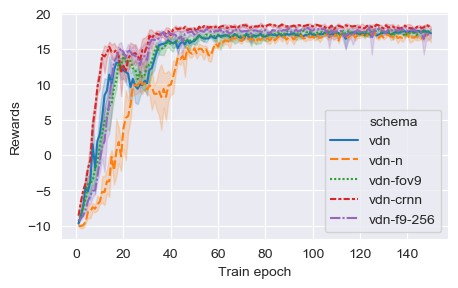

In [6]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=c)

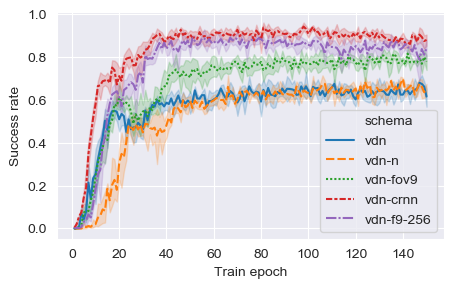

In [7]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=c)

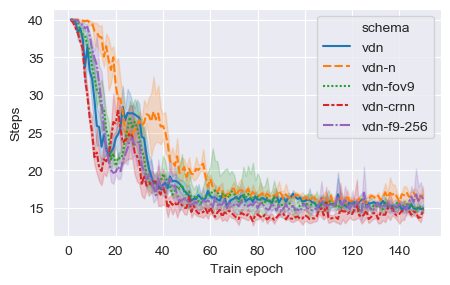

In [9]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=c)

In [5]:
a = load_vdn_data('vnd-2d')

In [6]:
b = load_ppo_data('ppo-2d',200,2)
print(b)

     Rewards  Success rate  Steps  Train epoch repeat  schema
0  -13.49575          0.02  39.43            2      0  ppo-2d
1  -10.45075          0.03  39.14            4      0  ppo-2d
2  -13.25225          0.04  38.85            6      0  ppo-2d
3   -7.45875          0.04  37.85            8      0  ppo-2d
4  -11.61100          0.04  38.12           10      0  ppo-2d
..       ...           ...    ...          ...    ...     ...
95  16.70075          0.87  11.73          192      3  ppo-2d
96  18.27575          0.88  10.94          194      3  ppo-2d
97  18.22825          0.93  10.66          196      3  ppo-2d
98  17.36000          0.89  12.27          198      3  ppo-2d
99  18.55800          0.94  10.37          200      3  ppo-2d

[400 rows x 6 columns]


In [7]:
c = pd.concat([a,b],axis=0)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

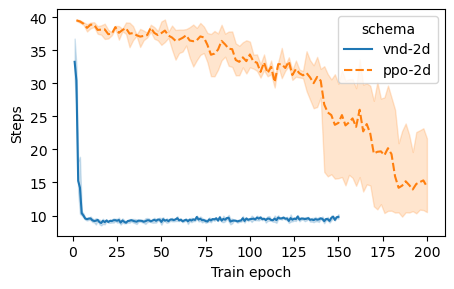

In [8]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=c)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

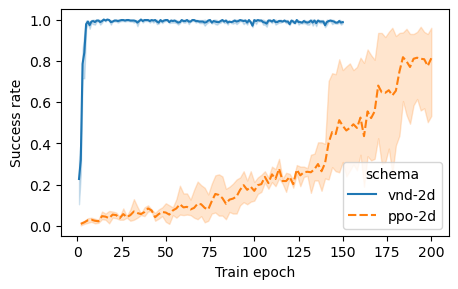

In [9]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=c)

In [11]:
d3 = load_vdn_data('vdn-3d')
d3p=load_ppo_data('ppo-3d',200,2)
d3total=pd.concat([d3,d3p])

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

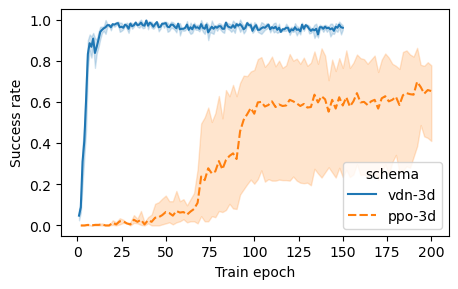

In [12]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=d3total)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

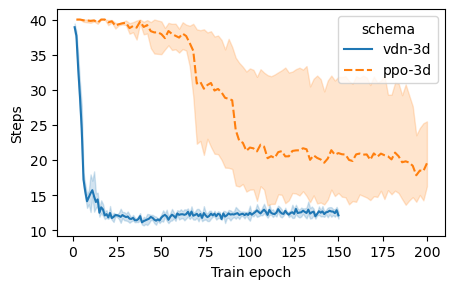

In [13]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=d3total)

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

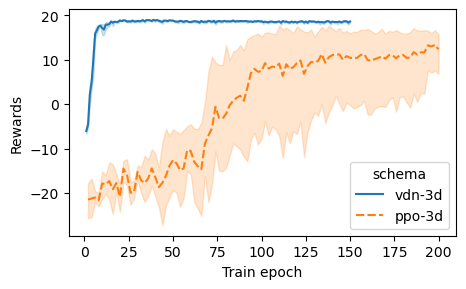

In [14]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=d3total)